# In this article I'd like to consider the ways to check the normality of given data.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import probplot, shapiro, kstest, normaltest
plt.rcParams['figure.figsize'] = (8, 5)

Let's use iris dataset from sklearn datasets base. Since we are not interested in the meaning of these data for now, the column names simply be integers.

In [2]:
sns.set_style('whitegrid')
df = pd.DataFrame(load_iris()["data"]).copy()
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


The first and the most rough way to check the notmality is a histogram. It's usually not much representative, but we can filter out some obviously not Gaussian data.

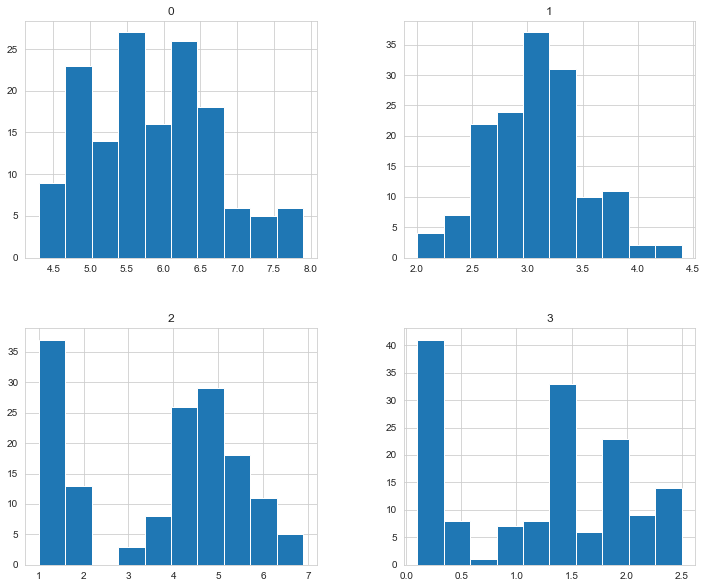

In [34]:
df.hist(figsize = (12, 10));

It seems that 2nd and 3rd columns consist data, that is not normal. Let's make it sure with kde plot.

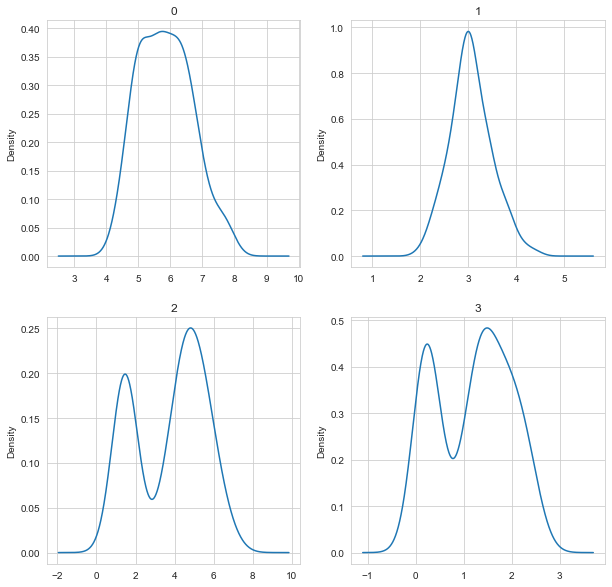

In [37]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax = ax.flatten()
for n, c in enumerate(df.columns):
    df[c].plot(kind = 'kde', ax = ax[n])
    ax[n].set_title(n)

Now we're more confident in columns 2 and 3 and, unlike histplot, kde also indicates, that 0 and 1 are likely to be normal. Let's check it first with Q-Q plot. 
(We still consider 2 and 3 columns, even though they're not normal, in educational purposes)

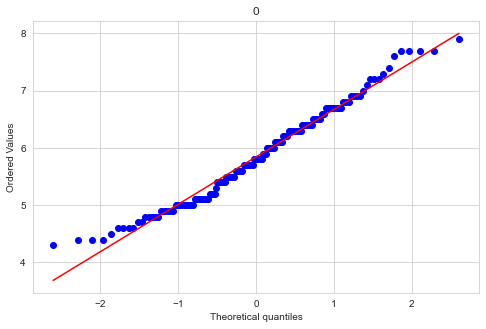

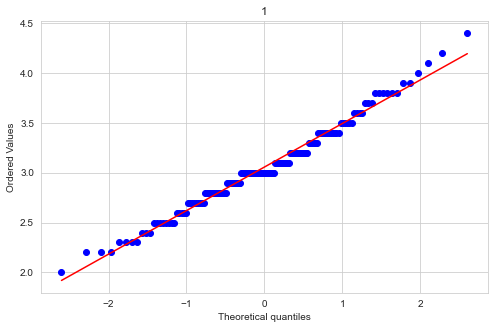

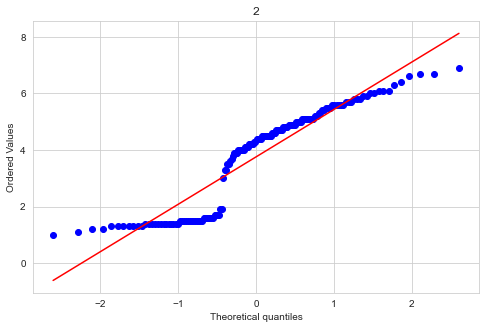

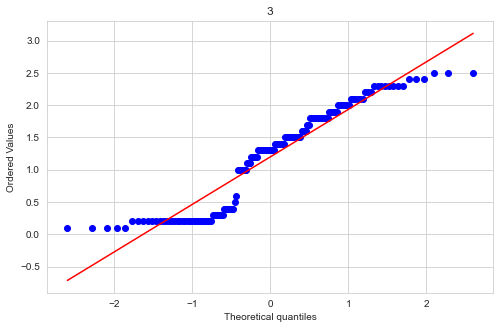

In [41]:
for i in df.columns:
    probplot(df[i], plot = plt)
    plt.title(i)
    plt.show()

First two graphs look pretty linear

# Statistical Normality Tests

There're many statistical tests that can be used to determine if data is taken from a Gaussian distribution. We will look at 3 of them, starting with Shapiro-Wilk Test

In [86]:
for i in df.columns:
    a = shapiro(df[i])
    print(f'Column {i}: {a} Result: {"Not Gaussian"  if a[1] < 0.05 else "Gaussian"}')

Column 0: ShapiroResult(statistic=0.9760899543762207, pvalue=0.010180278681218624) Result: Not Gaussian
Column 1: ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034) Result: Gaussian
Column 2: ShapiroResult(statistic=0.8762689232826233, pvalue=7.41295913542217e-10) Result: Not Gaussian
Column 3: ShapiroResult(statistic=0.9018341898918152, pvalue=1.680291461525485e-08) Result: Not Gaussian


We can see that even though the kde plot of Column 0 looks rather Normal, the p-value with the Shapiro-Wilk test is only 0.01.

The next test we consider is D’Agostino’s K^2 Test, that is also commonly used and believed to be reliable.

In [88]:
for i in df.columns:
    print(f'Column {i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

Column 0: Gaussian  NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)
Column 1: Gaussian  NormaltestResult(statistic=3.1238322481520377, pvalue=0.2097338099298262)
Column 2: Not Gaussian  NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)
Column 3: Not Gaussian  NormaltestResult(statistic=137.55596543193647, pvalue=1.3492785927137586e-30)


This test appears to be less sensitive for our data.

The last test for today is the Kolmogorov-Smirnov test.

In [90]:
for i in df.columns:
    print(f'{i}: {"Not Gaussian" if kstest(df[i].values,"norm")[1]<0.05 else "Gaussian"}  {kstest(df[i].values,"norm")}')

0: Not Gaussian  KstestResult(statistic=0.999991460094529, pvalue=0.0)
1: Not Gaussian  KstestResult(statistic=0.9794298858198347, pvalue=1.9343513094431768e-253)
2: Not Gaussian  KstestResult(statistic=0.8765328487477231, pvalue=1.4044248603466367e-136)
3: Not Gaussian  KstestResult(statistic=0.5459263761057697, pvalue=1.8764992713715694e-42)


All our data completely failed the Kolmogorov-Smirnov test. Good explanation of problems of kstest is given [here](https://stackoverflow.com/questions/7903977/implementing-a-kolmogorov-smirnov-test-in-python-scipy/7904652#7904652?newreg=fee2a71b791c4558afd00f60e4824221)

Now we can just run it with Standart Normal Distribution

KstestResult(statistic=0.09775206040251261, pvalue=0.27648765136016573)


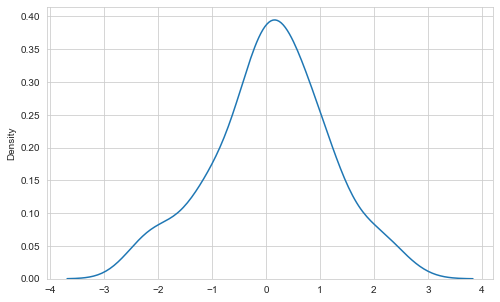

In [110]:
normal_dist = np.random.randn(100)
sns.kdeplot(normal_dist)
print(kstest(normal_dist, 'norm'))

These were the most commonly used methods to test the normality of data. Howewer, for many statistical techniques one needs data to be normaly distributed, but it fails all the tests. In this case, data transformation can help (check Data Transformation notebook)